In [288]:
import numpy as np

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import matplotlib.pyplot as plt
from skimage.io import imshow
import matplotlib.image as mpimg
#%matplotlib inline

import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.preprocessing.image import img_to_array

import mlxtend
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [289]:
# Input data files consisting of the images
pics = np.load("olivetti_faces.npy")
labels = np.load("olivetti_faces_target.npy")

In [290]:
print("pics: ", pics.shape)  #400 imagens de 64pixeis x 64pixeis
print("labels: ", labels.shape)

pics:  (400, 64, 64)
labels:  (400,)


In [291]:
Y = labels
X=pics.reshape(pics.shape[0], pics.shape[1]*pics.shape[2]) # reshape and store images in X

print("X shape:",X.shape)
print("Y shape:",Y.shape)

X shape: (400, 4096)
Y shape: (400,)


In [292]:
#Split data for train and test purposes
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.4, random_state=46)

print("x_train: ",x_train.shape)
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (240, 4096)
x_test:  (160, 4096)
y_train:  (240,)
y_test:  (160,)


In [293]:
class_name = ('0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39')

([<matplotlib.axis.XTick at 0x7f59c7d747f0>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23'),
  Text(24, 0, '24'),
  Text(25, 0, '25'),
  Text(26, 0, '26'),
  Text(27, 0, '27'),
  Text(28, 0, '28'),
  Text(29, 0, '29'),
  Text(30, 0, '30'),
  Text(31, 0, '31'),
  Text(32, 0, '32'),
  Text(33, 0, '33'),
  Text(34, 0, '34'),
  Text(35, 0, '35'),
  Text(36, 0, '36'),
  Text(37, 0, '37'),
  Text(38, 0, '38'),
  Text(39, 0, '39')])

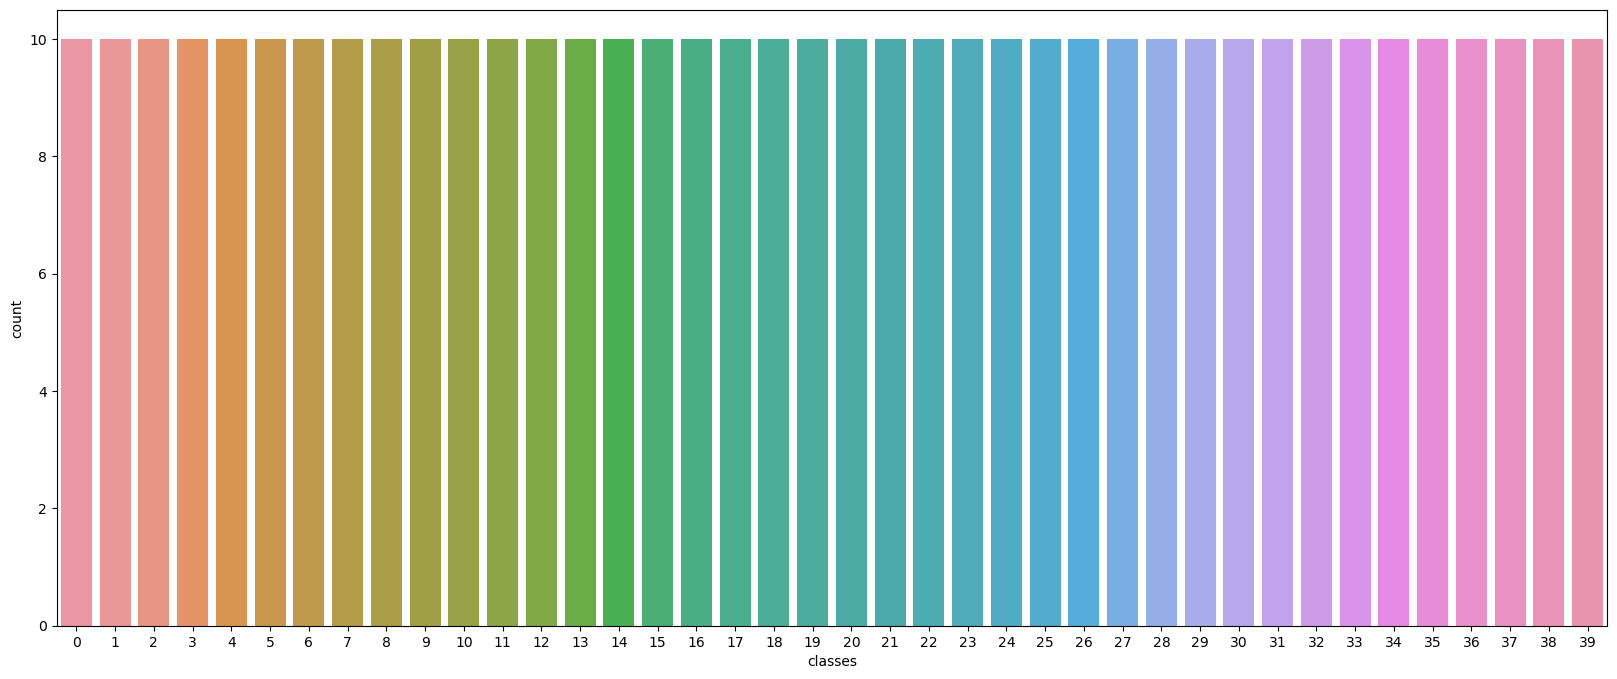

In [294]:
plt.figure(figsize = (20,8))
plt.xlabel('classes')
sns.countplot(x = Y)
x_pos = np.arange(len(class_name))
plt.xticks(x_pos, class_name)

In [295]:
print(x_train.shape)
print(x_test.shape)
xTrain = np.array(x_train.reshape(-1,64,64,1))
xTest = np.array(x_test.reshape(-1,64,64,1))
print(xTrain.shape)
print(xTest.shape)

(240, 4096)
(160, 4096)
(240, 64, 64, 1)
(160, 64, 64, 1)


In [296]:
lbTrain = LabelBinarizer()
lbTest = LabelBinarizer()
yTrain = lbTrain.fit_transform(y_train)
yTest = lbTest.fit_transform(y_test)

Text(0.5, 0.98, 'Some images from train data set')

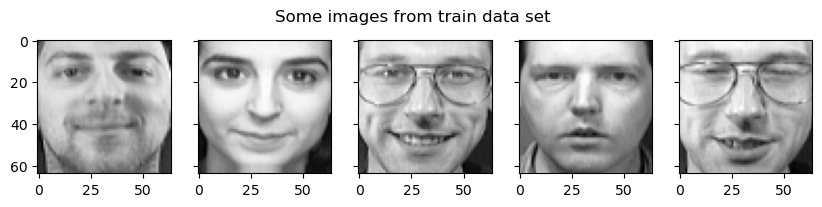

In [297]:
plt.style.use('_classic_test_patch')
fig, axs = plt.subplots(1, 5, figsize=(10, 2), sharey=True)
for i in range(5): 
    axs[i].imshow(xTrain[i].reshape(64,64),cmap='gray')
fig.suptitle('Some images from train data set')

In [298]:
model = Sequential()
# camada de convolução 1
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(64, 64 ,1) ))
model.add(MaxPooling2D(pool_size = (2, 2)))

# camada de convolução 2
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.30))

# camada de convolução 3
model.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.30))



model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.30))
model.add(Dense(40, activation = 'softmax')) #40 - number of classes

In [299]:
model.compile(loss = tensorflow.keras.losses.categorical_crossentropy, optimizer=tensorflow.keras.optimizers.Adam(), metrics=['accuracy'])

In [300]:
# Let's use 15% of our training dataset to validate our model

num_rows = xTrain.shape[0]
print(num_rows)
val_percent = 0.15
val_size = int(num_rows * val_percent) #4118 para validar os dados
train_size = num_rows - val_size  #23337 para dados de traino

xtrain_ds = xTrain[:train_size] #23337
xval_ds = xTrain[train_size:] #4118
ytrain_ds = yTrain[:train_size] #23337
yval_ds = yTrain[train_size:] #4118

240


In [301]:
history = model.fit(xtrain_ds, ytrain_ds, validation_data = (xval_ds, yval_ds), epochs=1000, batch_size=128)

Epoch 1/1000
2/2 [==============================] - 2s 578ms/step - loss: 3.7013 - accuracy: 0.0242 - val_loss: 3.6923 - val_accuracy: 0.0000e+00
Epoch 2/1000
2/2 [==============================] - 1s 458ms/step - loss: 3.6829 - accuracy: 0.0359 - val_loss: 3.6911 - val_accuracy: 0.0278
Epoch 3/1000
2/2 [==============================] - 1s 436ms/step - loss: 3.6780 - accuracy: 0.0372 - val_loss: 3.6946 - val_accuracy: 0.0278
Epoch 4/1000
2/2 [==============================] - 2s 1s/step - loss: 3.6816 - accuracy: 0.0242 - val_loss: 3.6975 - val_accuracy: 0.0278
Epoch 5/1000
2/2 [==============================] - 1s 494ms/step - loss: 3.6724 - accuracy: 0.0568 - val_loss: 3.7035 - val_accuracy: 0.0278
Epoch 6/1000
2/2 [==============================] - 1s 473ms/step - loss: 3.6667 - accuracy: 0.0444 - val_loss: 3.7032 - val_accuracy: 0.0278
Epoch 7/1000
2/2 [==============================] - 1s 463ms/step - loss: 3.6770 - accuracy: 0.0522 - val_loss: 3.7018 - val_accuracy: 0.0278
Epoch

Text(0.5, 1.0, 'Accurary Evolution (epochs=1000; dropout=0.30)')

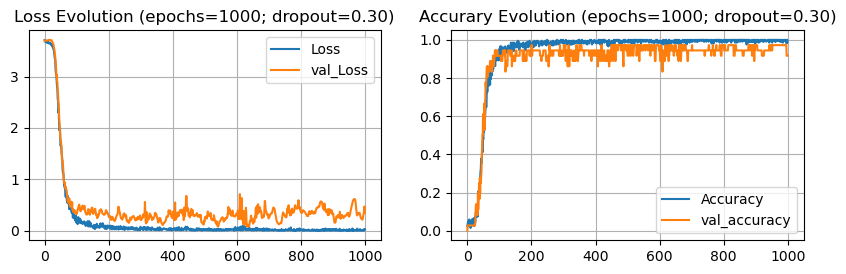

In [302]:
plt.style.use('default')
plt.figure(figsize = (10,6))

plt.subplot(2,2,1)
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'val_Loss')
plt.legend()
plt.grid()
plt.title('Loss Evolution (epochs=1000; dropout=0.30)')

plt.subplot(2,2,2)
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.grid()
plt.title('Accurary Evolution (epochs=1000; dropout=0.30)')

In [309]:
predicted_classes = model.predict_classes(xTest)
pred2 = np.zeros(shape=(80,))

for i in range(80):
    if(predicted_classes[i]>=9):
        pred2[i] = predicted_classes[i] + 1
    else:
        pred2[i] = predicted_classes[i]
pred2 = pred2.astype(int)

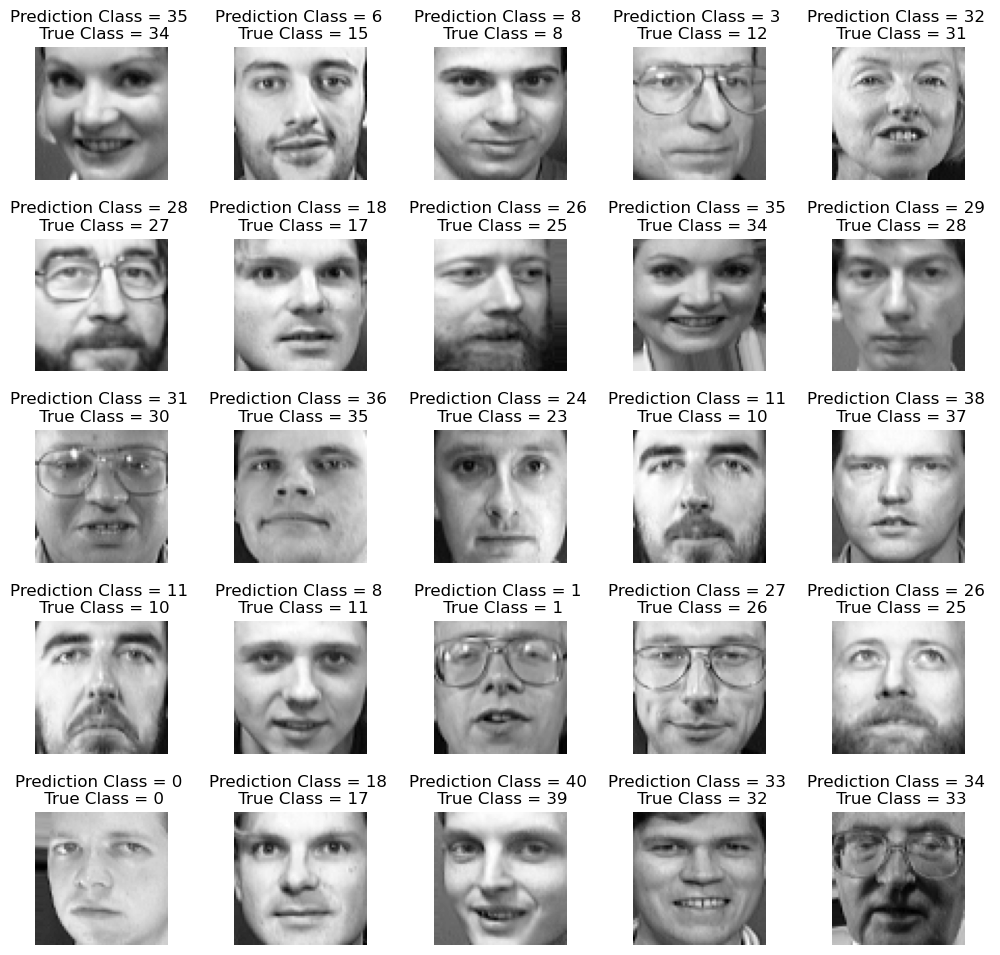

In [316]:
fig, axes = plt.subplots(5, 5, figsize = (12,12)) 
axes = axes.ravel() 
for i in np.arange (0, 5*5):
    if (predicted_classes[i] >= 9):
        axes[i].imshow(xTest[i].reshape(64,64), cmap='gray') 
        axes[i].set_title("Prediction Class = {0} \n True Class = {1}".format(pred2[i], y_test[i])) 
        axes[i].axis('off') 
    else:
        axes[i].imshow(xTest[i].reshape(64,64), cmap='gray',) 
        axes[i].set_title("Prediction Class = {0} \n True Class = {1}".format(pred2[i], y_test[i])) 
        axes[i].axis('off') 
plt.subplots_adjust(wspace = 0.5)

In [311]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Reds):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # matriz de confusao
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # visualizacao
    fig, ax = plt.subplots(figsize=(15, 15))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]), yticks=np.arange(cm.shape[0]), xticklabels=classes, yticklabels=classes, title=title, ylabel='True label', xlabel='Predicted label')

    # girar os rótulos e definir o alinhamento
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    # loop sobre dimensoes de dados e criar anotacoes de texto
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

np.set_printoptions(precision=2)

Confusion matrix, without normalization


<Figure size 2000x2000 with 0 Axes>

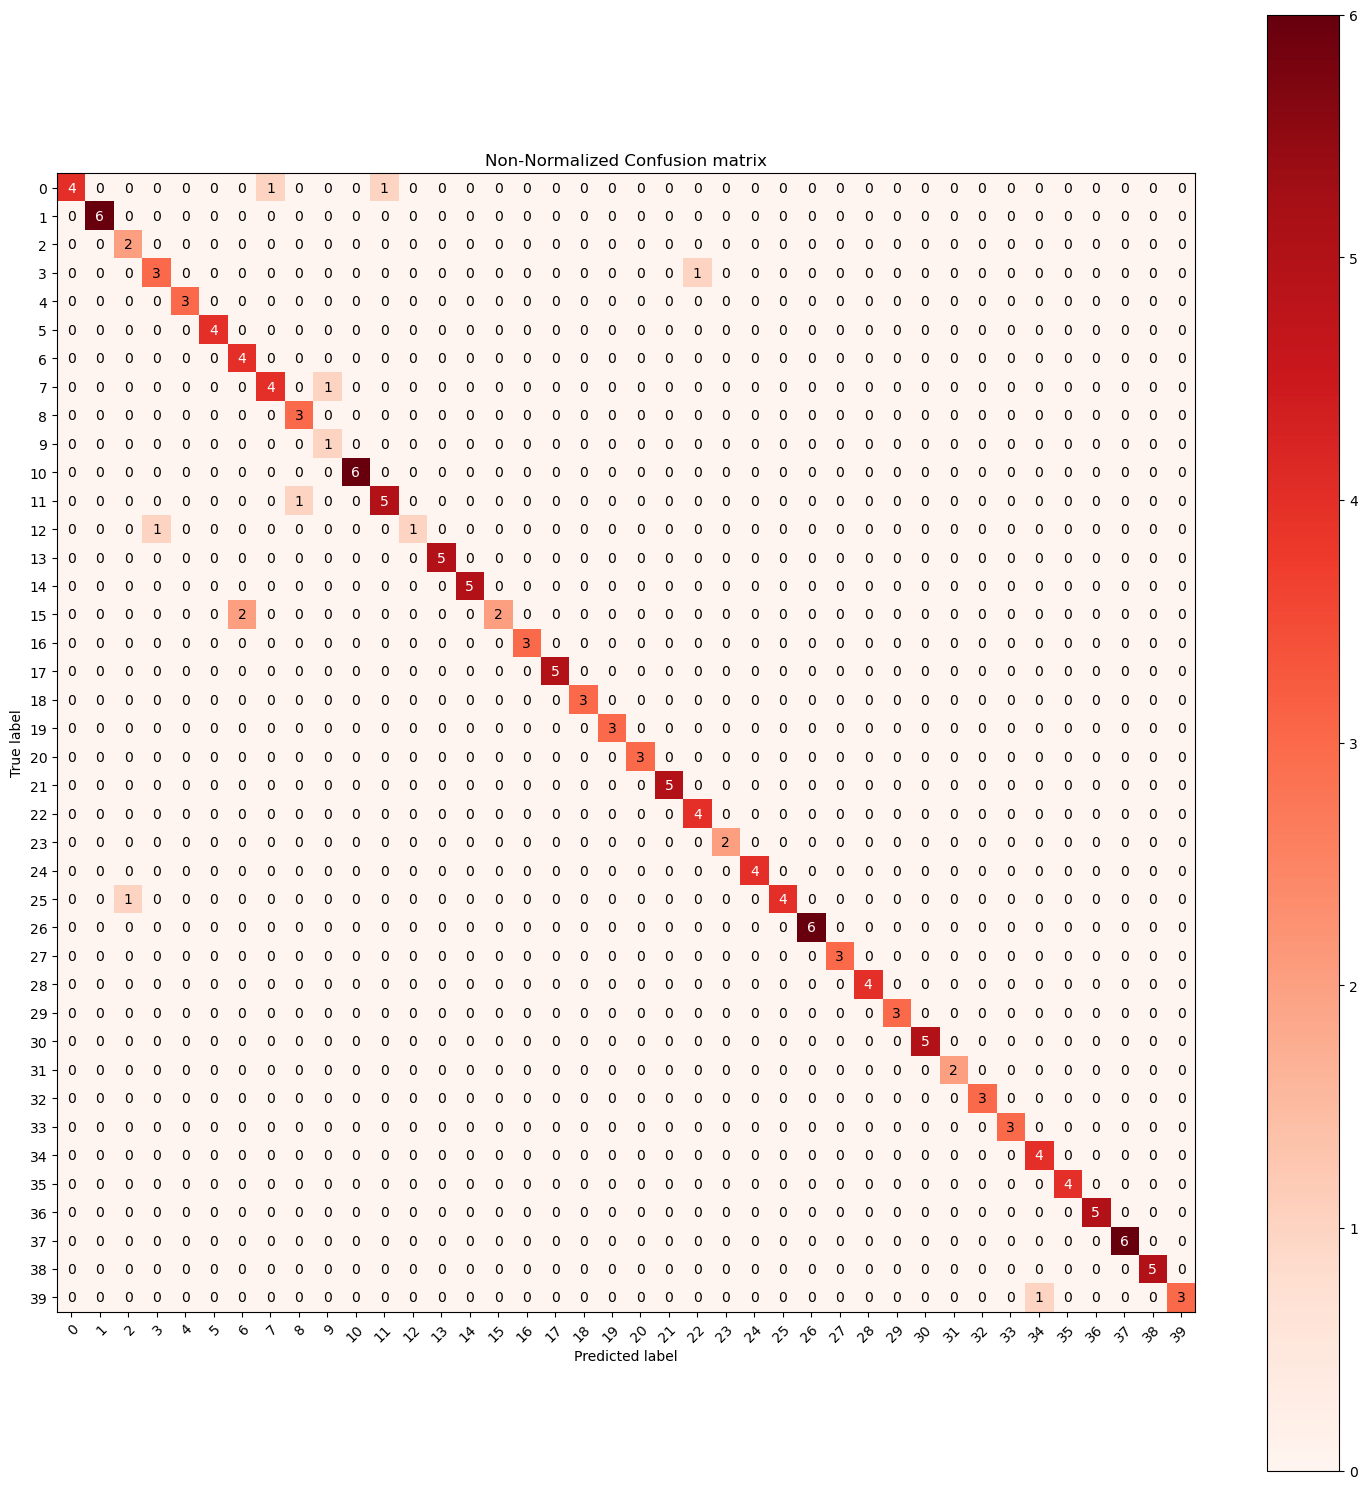

In [312]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(rounded_labels, predicted_classes, classes = class_name, title='Non-Normalized Confusion matrix')
plt.show()

Normalized confusion matrix


<Figure size 3500x3500 with 0 Axes>

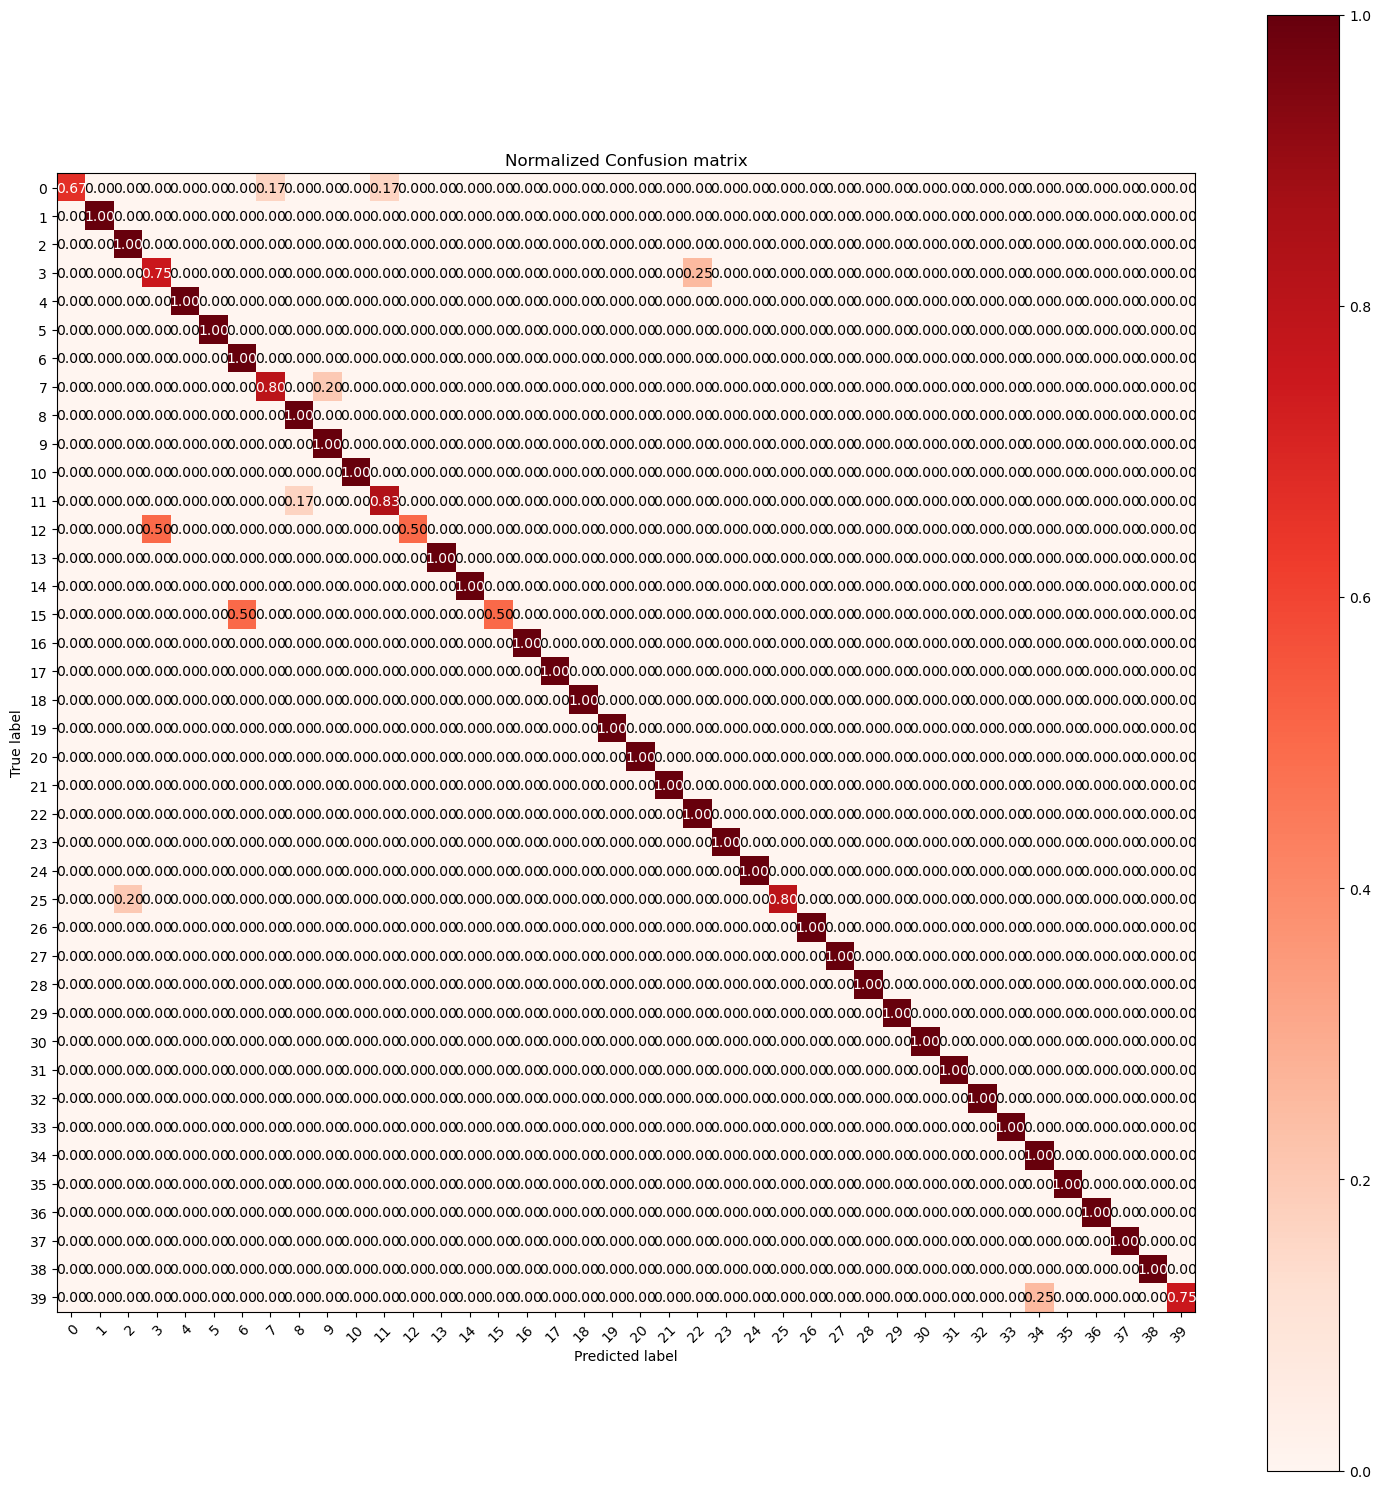

In [313]:
plt.figure(figsize=(35,35))
plot_confusion_matrix(rounded_labels, predicted_classes, classes = class_name, normalize=True, title='Normalized Confusion matrix')
plt.show()

In [315]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(rounded_labels, predicted_classes)
print('Accuracy Score = ',acc_score) 
#Accuracy Score =  0.0063  10   epo _ 0,20 drop
#Accuracy Score =  0.7375  50   epo _ 0,20 drop
#Accuracy Score =  0.9100  100  epo _ 0,20 drop
#Accuracy Score =  0.9275  500  epo _ 0,20 drop

#Accuracy Score =  0.9250  1000 epo _ 0,20 drop
#Accuracy Score =  0.9350  1000 epo _ 0,30 drop

#Accuracy Score =  0.9100  100  epo _ 0,20 drop
#Accuracy Score =  0.9250  100  epo _ 0,30 drop
#Accuracy Score =  0.8938  100  epo _ 0,40 drop

#Accuracy Score =  0.9275  500  epo _ 0,20 drop
#Accuracy Score =  0.9375  500  epo _ 0,30 drop
#Accuracy Score =  0.9225  500  epo _ 0,40 drop

Accuracy Score =  0.9375
